In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ifood_df = pd.read_csv('ifood_df.csv')

In [ ]:
ifood_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

#**Data Cleaning**

##Check for null values

In [ ]:
ifood_df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

There are no null values in this dataset.

#**Exploratory Data Analysis**

##Which Campaign with the most number of sales

In [ ]:
ifood_df['Purchases'] = ifood_df['NumDealsPurchases'] + ifood_df['NumWebPurchases'] + ifood_df['NumCatalogPurchases'] + ifood_df['NumStorePurchases']


In [ ]:
campaigns_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaigns_data = ifood_df[campaigns_columns]

In [ ]:
data = {
    'Campaigns': 'campaigns_data',
    'Purchases': ifood_df['Purchases']
}

df1 = pd.DataFrame(data)

In [ ]:
print(df1)

           Campaigns  Purchases
0     campaigns_data         25
1     campaigns_data          6
2     campaigns_data         21
3     campaigns_data          8
4     campaigns_data         19
...              ...        ...
2200  campaigns_data         18
2201  campaigns_data         22
2202  campaigns_data         19
2203  campaigns_data         23
2204  campaigns_data         11

[2205 rows x 2 columns]


In [ ]:
grouped_df1 = df1.groupby('Campaigns')
grouped_df1.apply(lambda x: x.sort_values(by = 'Purchases', ascending=False))

Campaigns  Purchases
Campaigns                                     
campaigns_data 20    campaigns_data         43
               415   campaigns_data         39
               395   campaigns_data         35
               609   campaigns_data         34
               1232  campaigns_data         34
...                             ...        ...
               9     campaigns_data          2
               754   campaigns_data          1
               2181  campaigns_data          1
               1499  campaigns_data          0
               961   campaigns_data          0

[2205 rows x 2 columns]

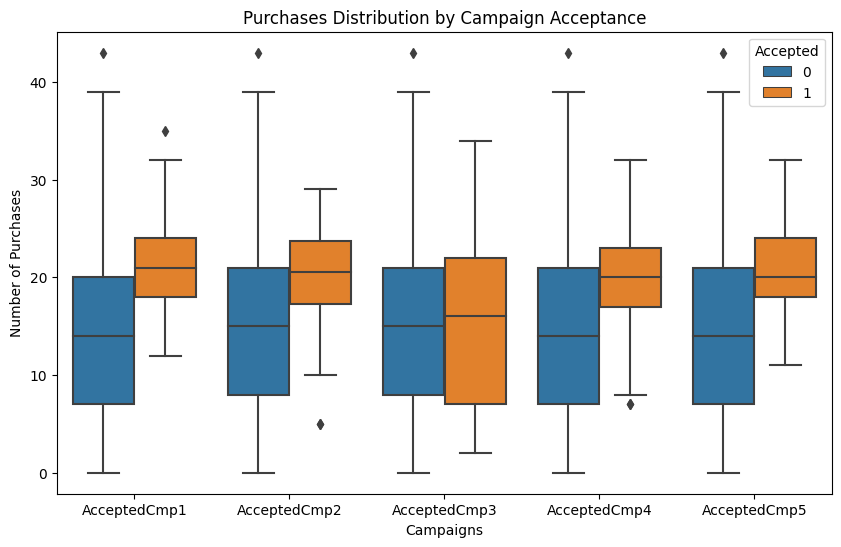

In [ ]:
campaigns_long = pd.melt(ifood_df[campaigns_columns + ['Purchases']], id_vars=['Purchases'], var_name='Campaign', value_name='Accepted')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Campaign', y='Purchases', hue='Accepted', data=campaigns_long)
plt.title('Purchases Distribution by Campaign Acceptance')
plt.xlabel('Campaigns')
plt.ylabel('Number of Purchases')
plt.legend(title='Accepted')
plt.show()

The highest sales that came from, specfically, what was campaigned was AccemptedCmp1. With the sales of 35, ranking 3rd overall highest sales.

##Spending habits between different **educational levels** and **marital status**

In [ ]:
ifood_df['marital_Married'].replace(1, 2, inplace=True)
ifood_df['marital_Together'].replace(1, 3,inplace=True)
ifood_df['marital_Divorced'].replace(1, 4, inplace=True)
ifood_df['marital_Widow'].replace(1, 5, inplace=True)

In [ ]:
ifood_df['Marital'] = ifood_df['marital_Divorced'] + ifood_df['marital_Married'] + ifood_df['marital_Single'] + ifood_df['marital_Together'] + ifood_df['marital_Widow']

In [ ]:
print(ifood_df['Marital'])

0       1
1       1
2       3
3       3
4       2
       ..
2200    2
2201    3
2202    4
2203    3
2204    2
Name: Marital, Length: 2205, dtype: int64


In [ ]:
ifood_df['education_2n Cycle'].replace(1, 2, inplace=True)
ifood_df['education_Graduation'].replace(1, 3,inplace=True)
ifood_df['education_Master'].replace(1, 4, inplace=True)
ifood_df['education_PhD'].replace(1, 5, inplace=True)

In [ ]:
ifood_df['Education'] = ifood_df['education_2n Cycle'] + ifood_df['education_Graduation'] + ifood_df['education_Master'] + ifood_df['education_PhD'] + ifood_df['education_Basic']

In [ ]:
print(ifood_df['Education'])

0       3
1       3
2       3
3       3
4       5
       ..
2200    3
2201    5
2202    3
2203    4
2204    5
Name: Education, Length: 2205, dtype: int64


In [ ]:
grouped_data = ifood_df.groupby(["Education", "Marital"])
spending_habits = grouped_data["MntTotal"].mean()
print(spending_habits)

Education  Marital
1          1           38.166667
           2           96.100000
           3           34.571429
           4           20.000000
           5           71.000000
2          1          517.171429
           2          379.675000
           3          430.767857
           4          626.681818
           5          633.000000
3          1          565.076613
           2          545.769231
           3          607.632509
           4          572.110169
           5          620.342857
4          1          707.298701
           2          529.572464
           3          528.900990
           4          504.405405
           5          747.272727
5          1          587.424242
           2          680.893048
           3          618.991228
           4          594.288462
           5          746.333333
Name: MntTotal, dtype: float64


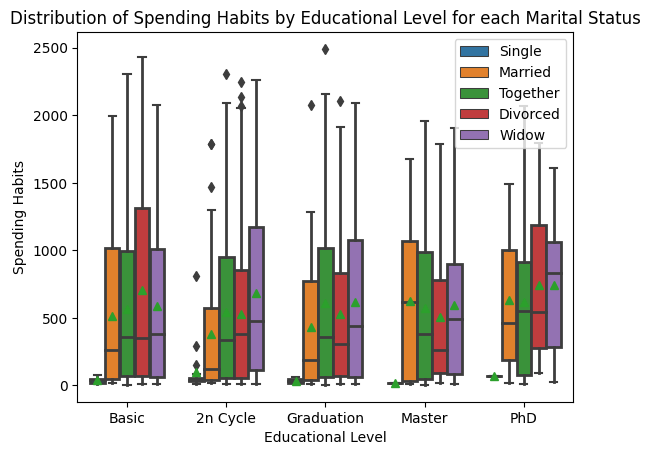

In [ ]:
education = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']
marital = ['Single', 'Married', 'Together', 'Divorced', 'Widow']

sns.boxplot(
    x = 'Marital',
    y = 'MntTotal',
    hue = 'Education',
    showmeans=True,
    boxprops=dict(linewidth=2),
    whiskerprops=dict(linewidth=2),
    medianprops=dict(linewidth=2),
    width=0.75,
    data=ifood_df
)

plt.xticks([0, 1, 2, 3, 4], education)
plt.xlabel("Educational Level")
plt.ylabel("Spending Habits")
plt.title("Distribution of Spending Habits by Educational Level for each Marital Status")

legend = plt.legend()
# Set new labels
for i, text in enumerate(legend.get_texts()):
    text.set_text(marital[i])

plt.show()

There is a general trend of rising spending habits with higher educational attainment. Additionally, divorced people tend to have larger spending habits than married or single customers.

## Age of Customers

<Axes: xlabel='Age', ylabel='Count'>

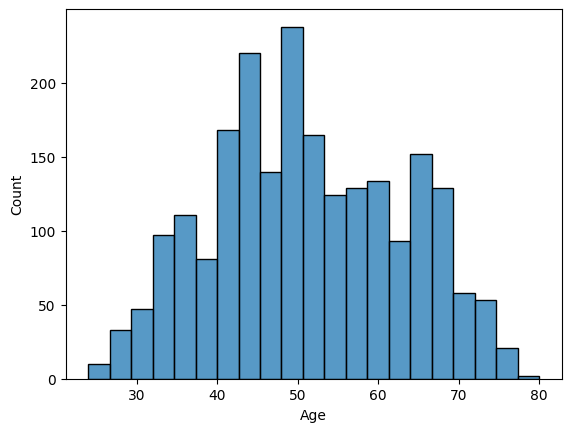

In [ ]:
sns.histplot(data = ifood_df, x= 'Age')

***People within the age of 50 have purchased more from the business compared to other age groups***

##Relationship between **income** and **total amount spent**

Text(0.5, 1.0, 'Relationship between INCOME and TOTAL AMOUNT SPENT')

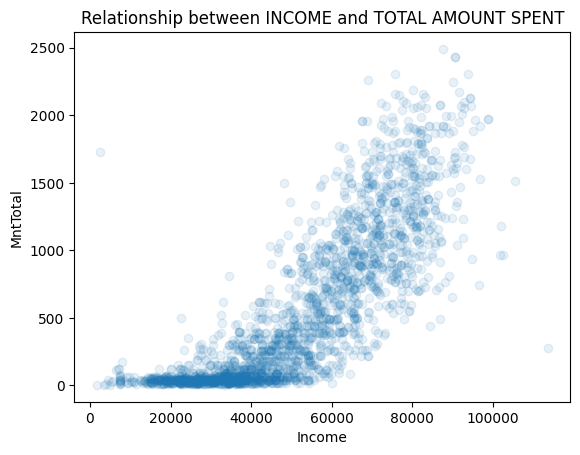

In [ ]:
plt.scatter(ifood_df['Income'], ifood_df['MntTotal'], alpha = 0.1)
plt.xlabel('Income')
plt.ylabel('MntTotal')
plt.title('Relationship between INCOME and TOTAL AMOUNT SPENT')

***There is a positive correlation between income and total amount spent which means that people with higher the income tend to have greater spendings.***

#**Visualization**



##Correlation between spending in one **product** and another

<Axes: >

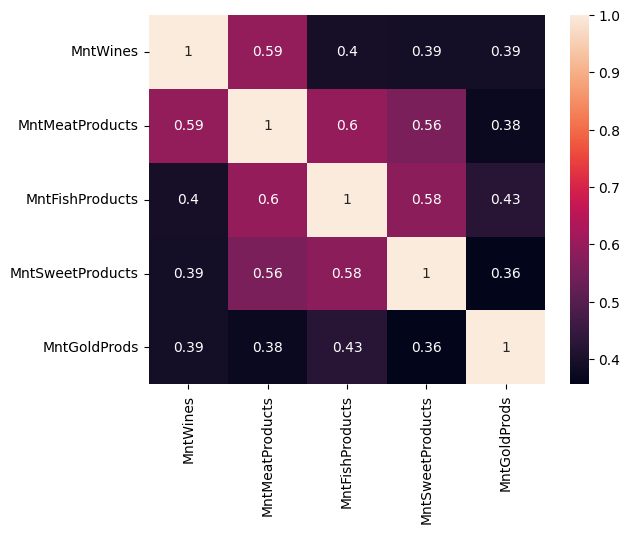

In [ ]:
#correlation between spending one category and another
#r >= 0.5 large or strong association
#r = 0.3 medium association
#r = 0.1 small or weak association

AmtProd = ['MntWines', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

sns.heatmap(ifood_df[AmtProd].corr(), annot = True)

The heatmap shows that there is a strong association between meat and wine products, which means that people who buy meat also buy wines. Likewise, people who buy meat products also buy fish.

##Spending habits/preferences among customers with kid and teen homes


In [ ]:
customers_with_kids_count = (ifood_df['Kidhome'] > 0).sum()
customers_with_teens_count = (ifood_df['Teenhome'] > 0).sum()
customers_with_kids_and_teens = ifood_df[(ifood_df['Kidhome'] > 0) & (ifood_df['Teenhome'] > 0)]
customers_with_no_kids_no_teens = ifood_df[(ifood_df['Kidhome'] == 0) & (ifood_df['Teenhome'] == 0)]

print("Number of customers who have kids:", customers_with_kids_count)
print("Number of customers who have teens:", customers_with_teens_count)
print("Number of customers who have both kids and teens:", len(customers_with_kids_and_teens))
print("Number of customers with no kids and no teens:", len(customers_with_no_kids_no_teens))

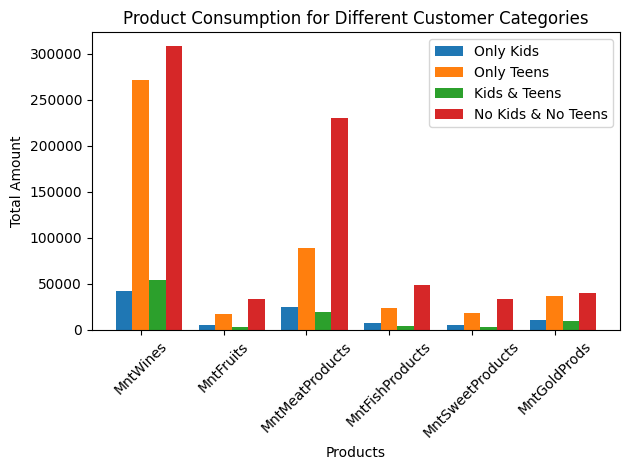

In [ ]:
products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

only_kids = ifood_df[(ifood_df["Kidhome"] > 0) & (ifood_df["Teenhome"] == 0)]
only_teens = ifood_df[(ifood_df["Kidhome"] == 0) & (ifood_df["Teenhome"] > 0)]
kids_and_teens = ifood_df[(ifood_df["Kidhome"] > 0) & (ifood_df["Teenhome"] > 0)]
no_kids_no_teens = ifood_df[(ifood_df["Kidhome"] == 0) & (ifood_df["Teenhome"] == 0)]


total_products_only_kids = only_kids[products].sum()
total_products_only_teens = only_teens[products].sum()
total_products_kids_and_teens = kids_and_teens[products].sum()
total_products_no_kids_no_teens = no_kids_no_teens[products].sum()

index = range(len(products))
bar_width = 0.2

plt.bar(index, total_products_only_kids, bar_width, label="Only Kids")
plt.bar([i + bar_width for i in index], total_products_only_teens, bar_width, label="Only Teens")
plt.bar([i + 2 * bar_width for i in index], total_products_kids_and_teens, bar_width, label="Kids & Teens")
plt.bar([i + 3 * bar_width for i in index], total_products_no_kids_no_teens, bar_width, label="No Kids & No Teens")



plt.xlabel("Products")
plt.ylabel("Total Amount")
plt.title("Product Consumption for Different Customer Categories")
plt.xticks([i + bar_width for i in index], products, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
print("Total consumption for different customer categories:")
print(f"Only Kids: {total_products_only_kids}")

print(f"Only Teens: {total_products_only_teens}")

print(f"Kids & Teens: {total_products_kids_and_teens}")

print(f"No Kids & No Teens: {total_products_no_kids_no_teens}")

Total consumption for different customer categories:
Only Kids: MntWines            41927
MntFruits            5135
MntMeatProducts     25143
MntFishProducts      7470
MntSweetProducts     4814
MntGoldProds        11039
dtype: int64
Only Teens: MntWines            271243
MntFruits            17459
MntMeatProducts      88774
MntFishProducts      23687
MntSweetProducts     18413
MntGoldProds         36374
dtype: int64
Kids & Teens: MntWines            53787
MntFruits            2697
MntMeatProducts     19750
MntFishProducts      3721
MntSweetProducts     2998
MntGoldProds         9303
dtype: int64
No Kids & No Teens: MntWines            308136
MntFruits            32928
MntMeatProducts     230846
MntFishProducts      48375
MntSweetProducts     33593
MntGoldProds         40430
dtype: int64


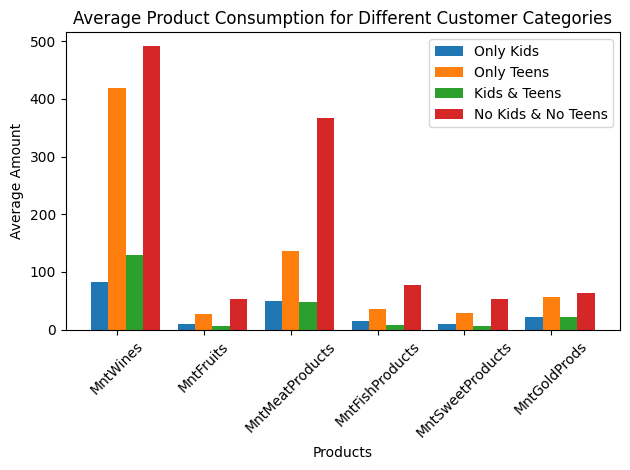

In [ ]:
avg_products_only_kids = only_kids[products].mean()
avg_products_only_teens = only_teens[products].mean()
avg_products_kids_and_teens = kids_and_teens[products].mean()
avg_products_no_kids_no_teens = no_kids_no_teens[products].mean()

index = range(len(products))
bar_width = 0.2

plt.bar(index, avg_products_only_kids, bar_width, label="Only Kids")
plt.bar([i + bar_width for i in index], avg_products_only_teens, bar_width, label="Only Teens")
plt.bar([i + 2 * bar_width for i in index], avg_products_kids_and_teens, bar_width, label="Kids & Teens")
plt.bar([i + 3 * bar_width for i in index], avg_products_no_kids_no_teens, bar_width, label="No Kids & No Teens")

plt.xlabel("Products")
plt.ylabel("Average Amount")
plt.title("Average Product Consumption for Different Customer Categories")
plt.xticks([i + bar_width for i in index], products, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print("Average consumption for different customer categories:")
print(f"Only Kids: {avg_products_only_kids}")

print(f"Only Teens: {avg_products_only_teens}")

print(f"Kids & Teens: {avg_products_kids_and_teens}")

print(f"No Kids & No Teens: {avg_products_no_kids_no_teens}")

Average consumption for different customer categories:
Only Kids: MntWines            82.048924
MntFruits           10.048924
MntMeatProducts     49.203523
MntFishProducts     14.618395
MntSweetProducts     9.420744
MntGoldProds        21.602740
dtype: float64
Only Teens: MntWines            418.584877
MntFruits            26.942901
MntMeatProducts     136.996914
MntFishProducts      36.554012
MntSweetProducts     28.415123
MntGoldProds         56.132716
dtype: float64
Kids & Teens: MntWines            128.677033
MntFruits             6.452153
MntMeatProducts      47.248804
MntFishProducts       8.901914
MntSweetProducts      7.172249
MntGoldProds         22.255981
dtype: float64
No Kids & No Teens: MntWines            490.662420
MntFruits            52.433121
MntMeatProducts     367.589172
MntFishProducts      77.030255
MntSweetProducts     53.492038
MntGoldProds         64.378981
dtype: float64


##Spending habits on **products** among customers with different **marital statuses**

([<matplotlib.axis.XTick at 0x7b332c4545b0>,
 [Text(0.17, 0, 'MntWines'),
  Text(1.17, 0, 'MntFruits'),
  Text(2.17, 0, 'MntMeatProducts'),
  Text(3.17, 0, 'MntFishProducts'),
  Text(4.17, 0, 'MntSweetProducts'),
  Text(5.17, 0, 'MntGoldProds')])

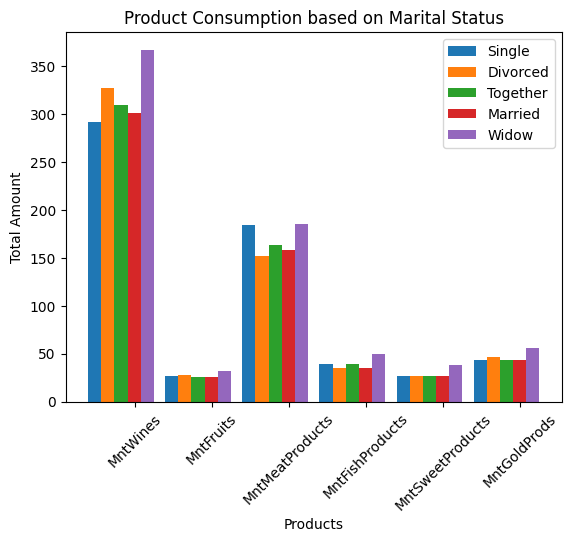

In [ ]:
products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

#selects 1
single = ifood_df[ifood_df['marital_Single'] > 0]
divorced = ifood_df[ifood_df['marital_Divorced'] > 0]
together = ifood_df[ifood_df['marital_Together'] > 0]
married = ifood_df[ifood_df['marital_Married'] > 0]
widow = ifood_df[ifood_df['marital_Widow'] > 0]

#extracts the mean due to large variations in the number of customers
single_sumprod = single[products].mean()
divorced_sumprod = divorced[products].mean()
together_sumprod = together[products].mean()
married_sumprod = married[products].mean()
widow_sumprod = widow[products].mean()

#barwidth
bar_width = 0.17
#index
index = np.arange(len(products))

#bar chart
plt.bar(index-0.35, single_sumprod, bar_width, label='Single')
plt.bar(index-0.18, divorced_sumprod, bar_width, label='Divorced')
plt.bar(index-0.01,together_sumprod, bar_width, label='Together')
plt.bar(index+0.16, married_sumprod, bar_width, label='Married')
plt.bar(index+0.33, widow_sumprod, bar_width, label='Widow')

#labels
plt.xlabel('Products')
plt.ylabel('Total Amount')
plt.title('Product Consumption based on Marital Status')
plt.legend()
plt.xticks([i + bar_width for i in index], products, rotation=45)


In [ ]:
print("Singles to products:", single_sumprod)
print('\n')
print("Divorced to products:", divorced_sumprod)
print('\n')
print("Together to products:", together_sumprod)
print('\n')
print("Married to products:", married_sumprod)
print('\n')
print("Widow to products:", widow_sumprod)

Singles to products: MntWines            291.651992
MntFruits            27.310273
MntMeatProducts     184.199161
MntFishProducts      39.197065
MntSweetProducts     26.916143
MntGoldProds         43.958071
dtype: float64


Divorced to products: MntWines            327.600000
MntFruits            27.634783
MntMeatProducts     151.473913
MntFishProducts      35.313043
MntSweetProducts     27.030435
MntGoldProds         46.578261
dtype: float64


Together to products: MntWines            309.552817
MntFruits            25.443662
MntMeatProducts     163.809859
MntFishProducts      39.198944
MntSweetProducts     26.345070
MntGoldProds         43.146127
dtype: float64


Married to products: MntWines            300.818501
MntFruits            25.716628
MntMeatProducts     157.707260
MntFishProducts      35.569087
MntSweetProducts     26.838407
MntGoldProds         42.989461
dtype: float64


Widow to products: MntWines            367.131579
MntFruits            31.868421
MntMeatProducts     1

##Preferences for **purchasing modes** among customers with different **marital statuses**

([<matplotlib.axis.XTick at 0x7b332c327c10>,
 [Text(0.15, 0, 'NumDealsPurchases'),
  Text(1.15, 0, 'NumWebPurchases'),
  Text(2.15, 0, 'NumCatalogPurchases'),
  Text(3.15, 0, 'NumStorePurchases')])

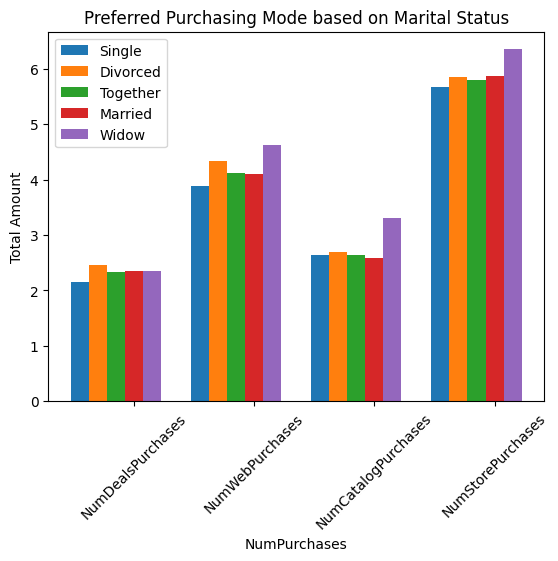

In [ ]:
NumPurchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

#extracts the mean due to large variations in the number of customers
single_nump = single[NumPurchases].mean()
divorced_nump = divorced[NumPurchases].mean()
together_nump = together[NumPurchases].mean()
married_nump = married[NumPurchases].mean()
widow_nump = widow[NumPurchases].mean()

#barwidth
bar_width = 0.15
#index
index = np.arange(len(NumPurchases))

#barchart
plt.bar(index-0.30, single_nump, bar_width, label='Single')
plt.bar(index-0.15, divorced_nump, bar_width, label='Divorced')
plt.bar(index-0.00, together_nump, bar_width, label='Together')
plt.bar(index+0.15, married_nump, bar_width, label='Married')
plt.bar(index+0.30, widow_nump, bar_width, label='Widow')

#labels
plt.xlabel('NumPurchases')
plt.ylabel('Total Amount')
plt.title('Preferred Purchasing Mode based on Marital Status')
plt.legend()
plt.xticks([i + bar_width for i in index], NumPurchases, rotation=45)

In [ ]:
print("Singles to purchase mode:", single_nump)
print('\n')
print("Divorced to purchase mode:", divorced_nump)
print('\n')
print("Together to purchase mode:", together_nump)
print('\n')
print("Married to purchase mode:", married_nump)
print('\n')
print("Widow to purchase mode:", widow_nump)

Singles to purchase mode: NumDealsPurchases      2.155136
NumWebPurchases        3.876310
NumCatalogPurchases    2.639413
NumStorePurchases      5.679245
dtype: float64


Divorced to purchase mode: NumDealsPurchases      2.452174
NumWebPurchases        4.339130
NumCatalogPurchases    2.691304
NumStorePurchases      5.860870
dtype: float64


Together to purchase mode: NumDealsPurchases      2.339789
NumWebPurchases        4.125000
NumCatalogPurchases    2.640845
NumStorePurchases      5.790493
dtype: float64


Married to purchase mode: NumDealsPurchases      2.355972
NumWebPurchases        4.099532
NumCatalogPurchases    2.580796
NumStorePurchases      5.868852
dtype: float64


Widow to purchase mode: NumDealsPurchases      2.355263
NumWebPurchases        4.618421
NumCatalogPurchases    3.302632
NumStorePurchases      6.355263
dtype: float64


##Preferences for **purchasing modes** among customers with different **educational levels**

([<matplotlib.axis.XTick at 0x7b33278896f0>,
 [Text(0.15, 0, 'NumDealsPurchases'),
  Text(1.15, 0, 'NumWebPurchases'),
  Text(2.15, 0, 'NumCatalogPurchases'),
  Text(3.15, 0, 'NumStorePurchases')])

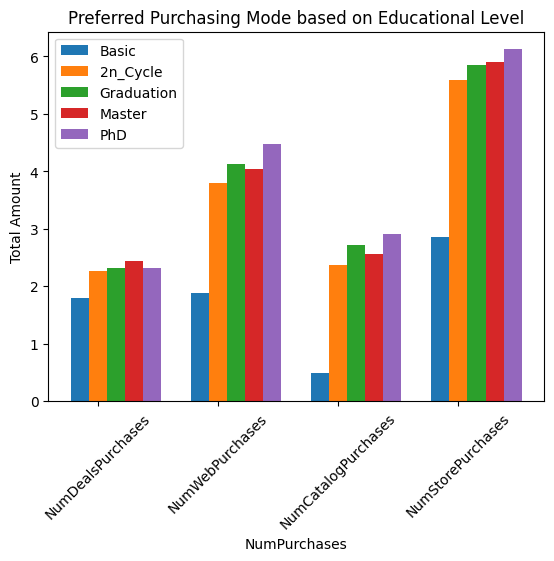

In [ ]:
NumPurchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

basic = ifood_df[ifood_df['education_Basic'] > 0]
second_cycle = ifood_df[ifood_df['education_2n Cycle'] > 0]
graduation = ifood_df[ifood_df['education_Graduation'] > 0]
master = ifood_df[ifood_df['education_Master'] > 0]
phd = ifood_df[ifood_df['education_PhD'] > 0]

basic_meanprod = basic[NumPurchases].mean()
second_cycle_meanprod = second_cycle[NumPurchases].mean()
graduation_meanprod = graduation[NumPurchases].mean()
master_meanprod = master[NumPurchases].mean()
phd_meanprod = phd[NumPurchases].mean()

educational_stat = [basic_meanprod, second_cycle_meanprod, graduation_meanprod, master_meanprod, phd_meanprod]

bar_width = 0.15 #barwidth
index = np.arange(len(NumPurchases)) #index

plt.bar(index, basic_meanprod, bar_width, label='Basic')
plt.bar([i + bar_width for i in index], second_cycle_meanprod, bar_width, label='2n_Cycle')
plt.bar([i + 2 * bar_width for i in index], graduation_meanprod, bar_width, label='Graduation')
plt.bar([i + 3 * bar_width for i in index], master_meanprod, bar_width, label='Master')
plt.bar([i + 4 * bar_width for i in index], phd_meanprod, bar_width, label='PhD')

plt.xlabel('NumPurchases')
plt.ylabel('Total Amount')
plt.title('Preferred Purchasing Mode based on Educational Level')
plt.legend()
plt.xticks([i + bar_width for i in index], NumPurchases, rotation=45)

In [ ]:
print("Basic to purchase mode:", basic_meanprod)
print('\n')
print("2n Cycle to purchase mode:", second_cycle_meanprod)
print('\n')
print("Graduation to purchase mode:", graduation_meanprod)
print('\n')
print("Master to purchase mode:", master_meanprod)
print('\n')
print("PhD to purchase mode:", phd_meanprod)

Basic to purchase mode: NumDealsPurchases      1.796296
NumWebPurchases        1.888889
NumCatalogPurchases    0.481481
NumStorePurchases      2.851852
dtype: float64


2n Cycle to purchase mode: NumDealsPurchases      2.272727
NumWebPurchases        3.787879
NumCatalogPurchases    2.373737
NumStorePurchases      5.595960
dtype: float64


Graduation to purchase mode: NumDealsPurchases      2.314465
NumWebPurchases        4.123989
NumCatalogPurchases    2.719677
NumStorePurchases      5.854447
dtype: float64


Master to purchase mode: NumDealsPurchases      2.431319
NumWebPurchases        4.043956
NumCatalogPurchases    2.552198
NumStorePurchases      5.901099
dtype: float64


PhD to purchase mode: NumDealsPurchases      2.319328
NumWebPurchases        4.470588
NumCatalogPurchases    2.901261
NumStorePurchases      6.123950
dtype: float64


## Correlation between **spending habits/preferences** with **household income**

### Purchasing modes

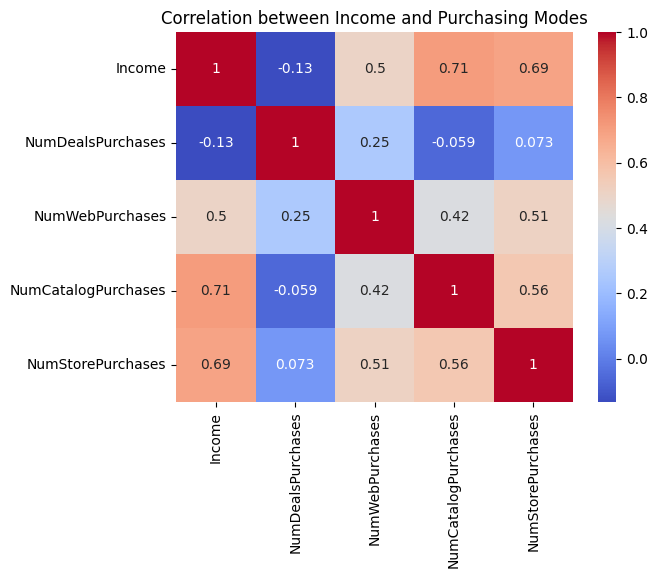

In [ ]:
purchasing_modes = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
correlation_matrix_modes = ifood_df[['Income'] + purchasing_modes].corr()

sns.heatmap(correlation_matrix_modes, annot=True, cmap='coolwarm')
plt.title('Correlation between Income and Purchasing Modes')
plt.show()

**Income and Catalog Purchases:**
  * There is a strong positive correlation (0.71)
  * As income increases, customers tend to make more purchases through catalogs.

**Income and Store Purchases:**
  * Household income also shows a strong positive correlation (0.69)
  * Higher income levels might be associated with an increased number of in-store purchases.

**Income and Web Purchases:**
  * A moderate positive correlation (0.5)
  * Higher-income customers are somewhat more likely to make purchases online.

**Income and Deals Purchases:**
  * There is a slight negative correlation (-0.13)
  * Customers with higher incomes are slightly less inclined to purchase items on deals or promotions.

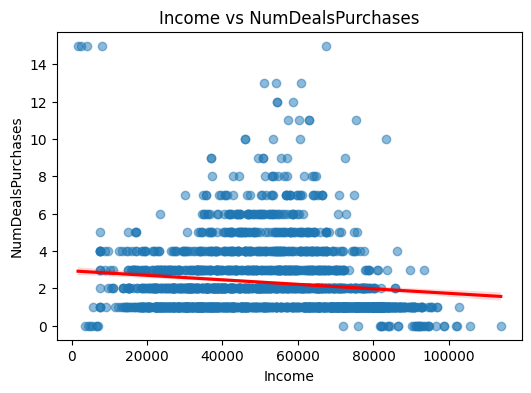

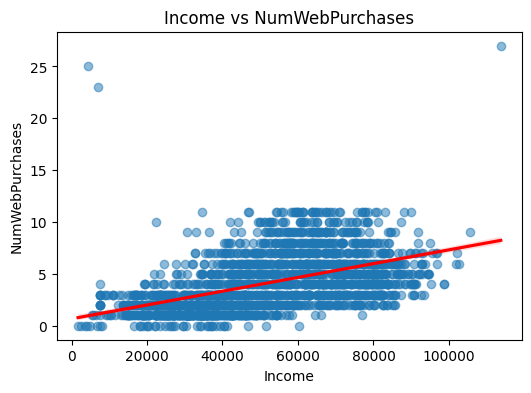

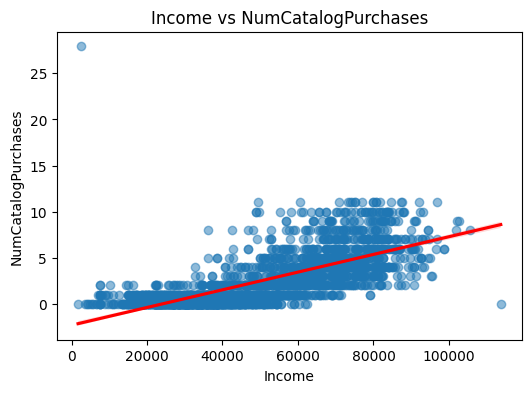

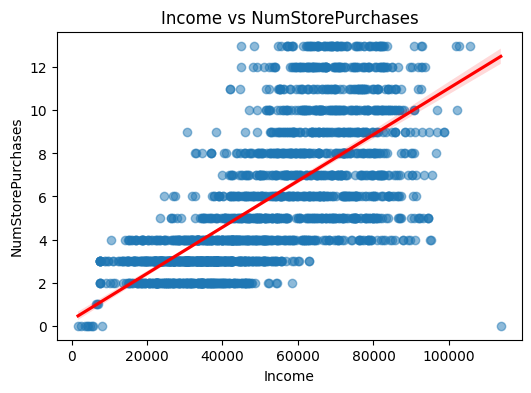

In [ ]:
for purchase_mode in purchasing_modes:
  plt.figure(figsize=(6, 4))
  sns.regplot(x='Income', y=purchase_mode, data=ifood_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
  plt.title(f'Income vs {purchase_mode}')
  plt.xlabel('Income')
  plt.ylabel(purchase_mode)
  plt.show()

**Income vs. NumDealsPurchases**
* Slight negative trend
* As income increases, the number of deal purchases tends to decrease slightly.
* Higher-income customers are less likely to be attracted to deals or promotions, possibly due to a lower sensitivity to price.

**Income vs. NumWebPurchases**
* Positive correlation
* Customers with higher incomes appear to make more purchases online.
* Higher-income individuals may have a preference for the convenience of online shopping or are possibly more attuned to digital shopping platforms.

**Income vs. NumCatalogPurchases**
* More pronounced positive correlation
* Positive relationship is stronger than that observed with web purchases, indicating that catalog shopping is particularly popular among higher-income customers.
* May be dure to catalogs often targeting higher-end products or customers who prefer a more curated shopping experience.

**Income vs. NumStorePurchases**
* Strong positive correlation between income and the number of store purchases.
* Most pronounced among the purchasing behaviors analyzed
* Customers with higher incomes tend to do more of their shopping in physical stores.
* Higher-income customers value the in-store experience, or it might reflect a higher propensity to purchase items that are typically not bought online, such as luxury goods or services.

### Amount spent on a product type


In [ ]:
product_spending = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
correlation_matrix_spending = ifood_df[['Income'] + product_spending].corr()

sns.heatmap(correlation_matrix_spending, annot=True, cmap='coolwarm')
plt.title('Correlation between Income and Spending on Product Types')
plt.show()

**Wine Spending (MntWines):**
* Strong positive correlation with income (0.73).
* Higher-income individuals likely to spend more on wine.
* Indicates a preference for wine as a luxury good among wealthier segments.

**Fruit Spending (MntFruits):**
* Moderate positive correlation with income (0.54).
* Suggests higher-income households may prioritize or have greater access to healthier food options like fruits.

**Meat Products Spending (MntMeatProducts):**
* Strong positive correlation with income (0.7).
* Reflects a trend towards purchasing premium meat products or consuming more meat with increasing income.

**Fish Products Spending (MntFishProducts):**
* Moderate positive correlation with income (0.55).
* Indicates that fish, often viewed as a healthier option, is purchased more by those with higher incomes.

**Sweet Products Spending (MntSweetProducts):**
* Moderate positive correlation with income (0.56).
* Higher-income groups may indulge more in sweets or have a wider selection available to them.

**Gold Products Spending (MntGoldProds):**
* Moderate positive correlation with income (0.42), the lowest among the categories.
* Suggests an increase in spending on these items with income, but not as strongly as other categories, possibly due to their nature as luxury or investment items.

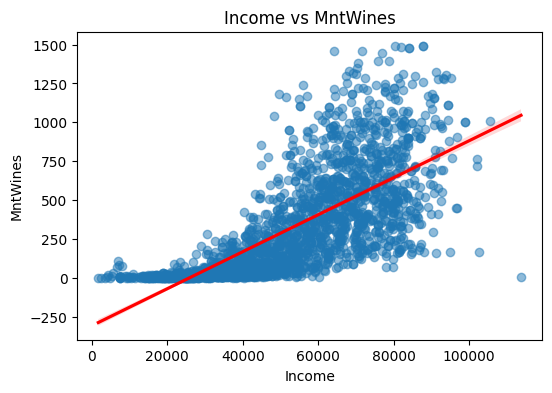

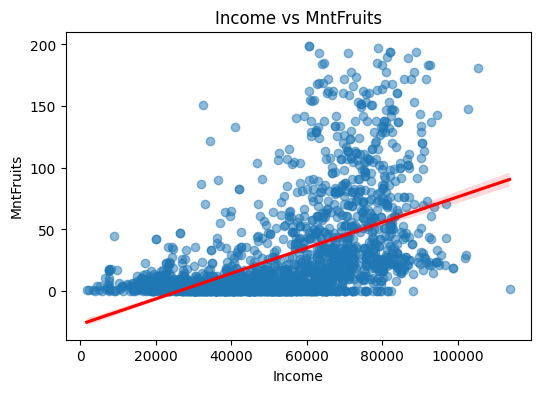

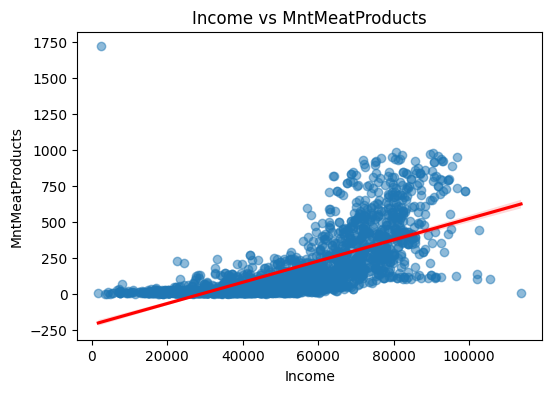

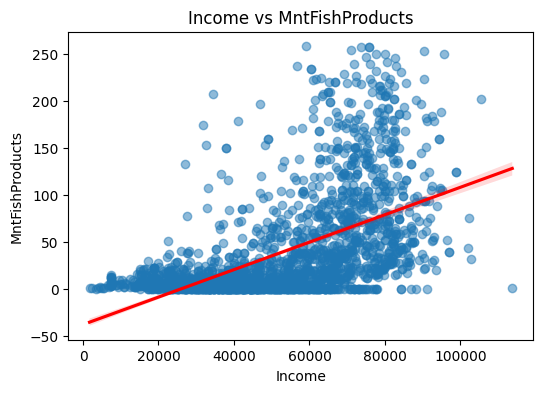

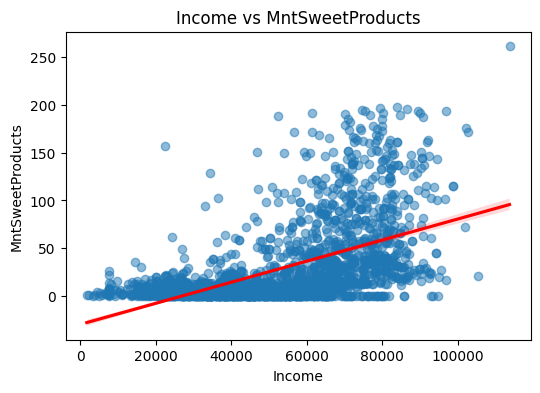

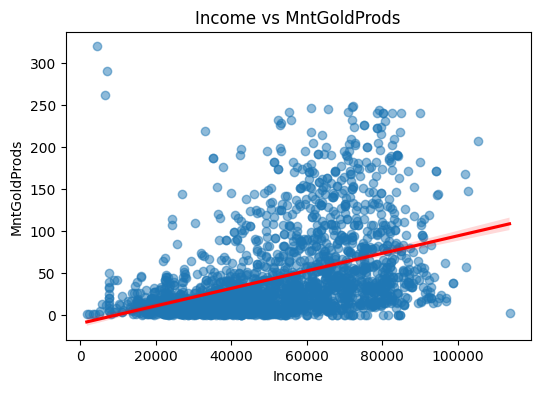

In [ ]:
product_spending = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
for product_type in product_spending:
  plt.figure(figsize=(6, 4))
  sns.regplot(x='Income', y=product_type, data=ifood_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
  plt.title(f'Income vs {product_type}')
  plt.xlabel('Income')
  plt.ylabel(product_type)
  plt.show()

**Income vs MntWines (Wines):**
* Strong positive correlation indicated by the upward trend line.
* As income increases, spending on wines shows a significant increase.
* Reflects wines as a preferred product for higher-income customers.

**Income vs MntFruits (Fruits):**
* Positive but weaker correlation compared to wines.
* There is an increase in spending on fruits as income rises.
* Suggests fruits are a moderately income-elastic category.

**Income vs MntMeatProducts (Meat Products):**
* Strong positive correlation similar to wines.
* Higher-income households tend to spend considerably more on meat products.
* Indicates a trend toward premium meat products among wealthier customers.

**Income vs MntFishProducts (Fish Products):**
* Positive correlation with a noticeable increase in spending with higher incomes.
* Suggests that fish products are a popular choice among higher-income groups.

**Income vs MntSweetProducts (Sweet Products):**
* Positive correlation, albeit less pronounced than meat or wines.
* Indicates that spending on sweet products increases with income but is not as strongly influenced by income as some other categories.

**Income vs MntGoldProds (Gold Products):**
* Positive correlation, showing an increase in spending as income grows.
* The trend suggests that gold products may be considered luxury items or investments and thus more frequently purchased by those with higher incomes.